# MNIST - Neural Networks

### Importing the Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.set_printoptions(precision=2)

### Importing the data

In [66]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [67]:
data_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = data_train.iloc[:, 1:].values
X_test = data_test.iloc[:, :].values
Y = data_train.iloc[:, 0].values

In [70]:
X.shape,X_test.shape,Y.shape

((42000, 784), (28000, 784), (42000,))

In [71]:
X = X.T
X_test = X_test.T
Y = Y.reshape(len(Y),1)
X.shape,X_test.shape,Y.shape

((784, 42000), (784, 28000), (42000, 1))

In [72]:
Y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

coltrans = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse=False), [0])])
Y = np.array(coltrans.fit_transform(Y))
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [74]:
print("Shape of X is", X.shape)
print("Shape of Y is", Y.shape)
print("Shape of X_test is", X_test.shape)
print("Total number of training example", X.shape[1])

Shape of X is (784, 42000)
Shape of Y is (42000, 10)
Shape of X_test is (784, 28000)
Total number of training example 42000


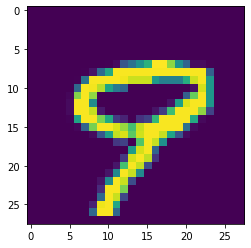

Number is 9


In [75]:
index = random.randint(0, X.shape[1])
plt.imshow(X[:, index].reshape(28,28))
plt.show()
print("Number is",list(Y[index,:]).index(1.))

### Initialize Parameters

##### Layer Sizes

In [79]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[1]
    n_h = 1000
    return n_x,n_y,n_h

In [80]:
n_x,n_y,n_h = layer_sizes(X,Y)
print("The size of Input Layer n_x is", n_x)
print("The size of Hidden Layer n_h is", n_h)
print("The size of Output Layer n_y is", n_y)

The size of Input Layer n_x is 784
The size of Hidden Layer n_h is 1000
The size of Output Layer n_y is 10


In [76]:
def initial_parameters(X,)

SyntaxError: invalid syntax (Temp/ipykernel_3228/3256394871.py, line 1)